In [9]:
# Import library yang dibutuhkan untuk analisis dan visualisasi
import numpy as np  # Untuk operasi numerik seperti mean, regresi manual
import pandas as pd  # Untuk membaca, memanipulasi dan menganalisis data
import seaborn as sns  # Untuk membuat visualisasi data statistik seperti heatmap, boxplot dsb
import matplotlib.pyplot as plt  # Untuk menampilkan visualisasi grafik

In [10]:
ds = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv') # Membaca dataset Sleep Health dari file CSV
ds.head() #untuk menampilkan 5 baris data pertama 

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [11]:
ds.shape #untuk mengecek jumlah baris dan kolomnya

(374, 13)

In [12]:
ds.info() # Menampilkan struktur dan info dasar dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [13]:
ds['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [14]:
ds['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [15]:
#Menghapus data duplikat
ds_no_dp = ds.drop_duplicates()
print (ds_no_dp)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [16]:
#identifikasi data hilang
missing = ds.isna().sum()
print (missing)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [17]:
ds[['Systolic', 'Diastolic']] = ds['Blood Pressure'].str.split('/', expand=True).astype(float)  # Memisahkan nilai 'Blood Pressure' menjadi dua kolom numerik

<h3>Statistika Dasar</h3>

In [18]:
num =  ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level','Stress Level', 'Systolic', 'Diastolic','Heart Rate', 'Daily Steps']
obj =  ['Gender', 'Occupation','BMI Category','Sleep Disorder']

ds[num + obj].mode()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic,Diastolic,Heart Rate,Daily Steps,Gender,Occupation,BMI Category,Sleep Disorder
0,43,7.2,8,60,3,130.0,80.0,68,8000,Male,Nurse,Normal,Sleep Apnea


In [19]:
ds.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


<h3>Distribusi</h3>

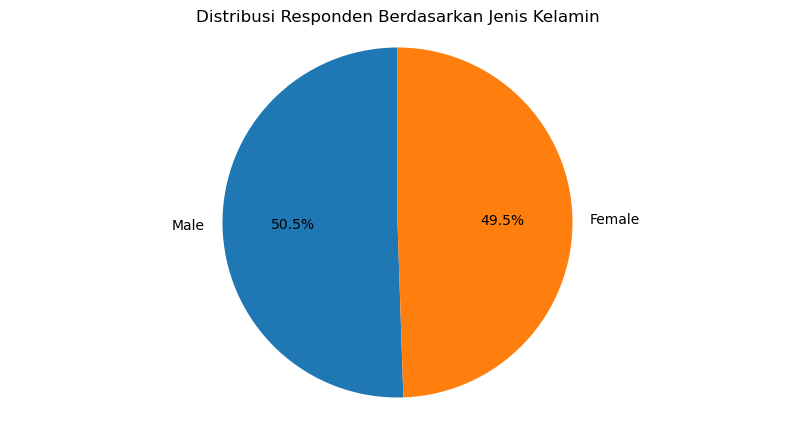

In [20]:
# Distribusi Responden Berdasarkan Jenis Kelamin
plt.figure(figsize=(10, 5))
plt.pie(ds['Gender'].value_counts(),labels=ds['Gender'].value_counts().index, startangle=90,autopct='%1.1f%%')
plt.title ('Distribusi Responden Berdasarkan Jenis Kelamin')
plt.axis('equal')
plt.show()

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_13152\4287387687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x="Occupation", palette="Set3")


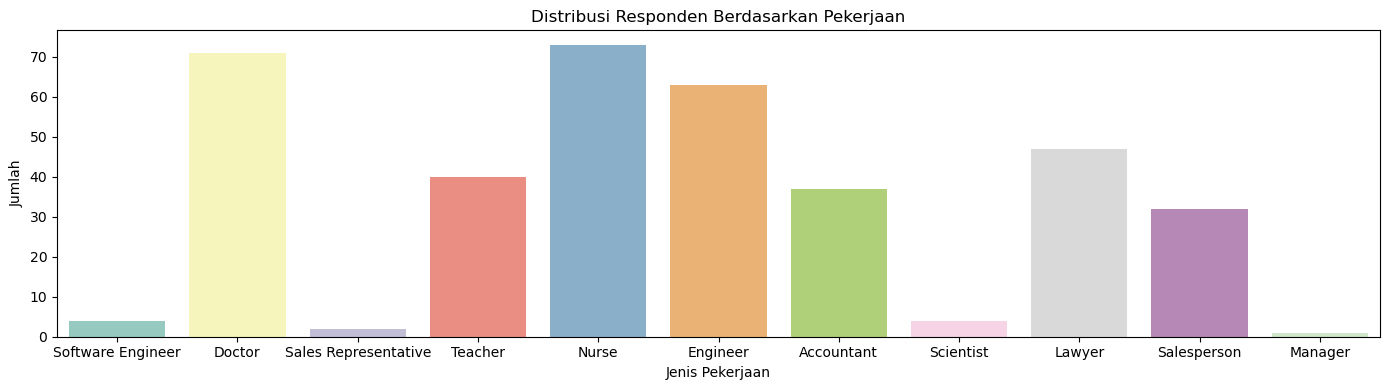

In [21]:
# Distribusi Responden Berdasarkan Pekerjaan
plt.figure(figsize=(14, 4))
sns.countplot(data=ds, x="Occupation", palette="Set3")
plt.title("Distribusi Responden Berdasarkan Pekerjaan")
plt.xlabel ("Jenis Pekerjaan")
plt.ylabel ("Jumlah")
plt.tight_layout() # untuk mengatur tata letak
plt.show()

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_13152\2068381708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x="BMI Category", palette="Set3")


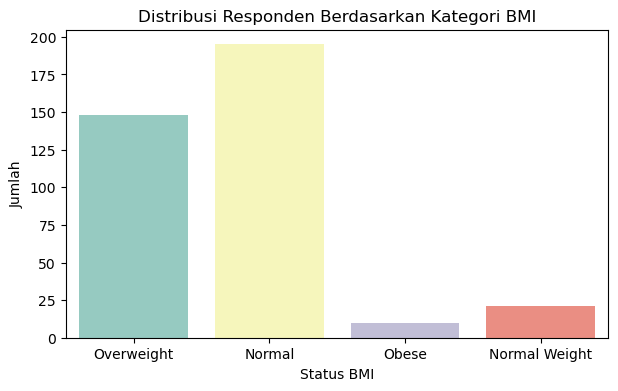

In [22]:
# Distribusi Responden Berdasarkan kategori BMI ( body mass index )
plt.figure(figsize=(7,4))
sns.countplot(data=ds, x="BMI Category", palette="Set3")
plt.title('Distribusi Responden Berdasarkan Kategori BMI')
plt.xlabel('Status BMI')
plt.ylabel('Jumlah')
plt.show()

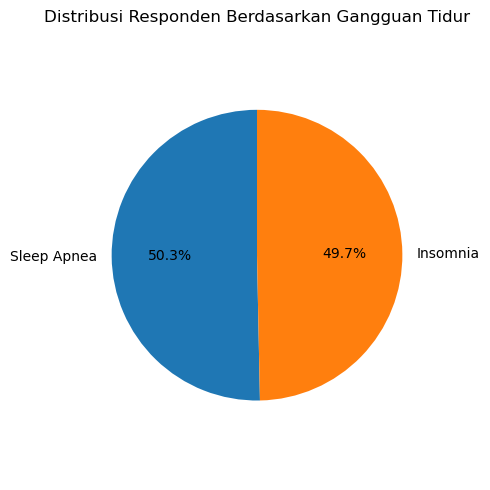

In [23]:
# Distribusi Responden Berdasarkan kategori Gangguan Tidur
plt.figure(figsize=(5,5))
plt.pie(ds['Sleep Disorder'].value_counts(),labels=ds['Sleep Disorder'].value_counts().index, startangle=90,autopct='%1.1f%%')
plt.title ('Distribusi Responden Berdasarkan Gangguan Tidur')
plt.axis('equal')
plt.tight_layout()
plt.show()

<h3>Korelasi</h3>

In [24]:
# Korelasi semua numerik terhadap Quality of Sleep
corr_qos = ds[num].corr()['Quality of Sleep'].sort_values(ascending=False)
print("Korelasi terhadap Quality of Sleep:")
print(corr_qos)

Korelasi terhadap Quality of Sleep:
Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Physical Activity Level    0.192896
Daily Steps                0.016791
Diastolic                 -0.110151
Systolic                  -0.121632
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


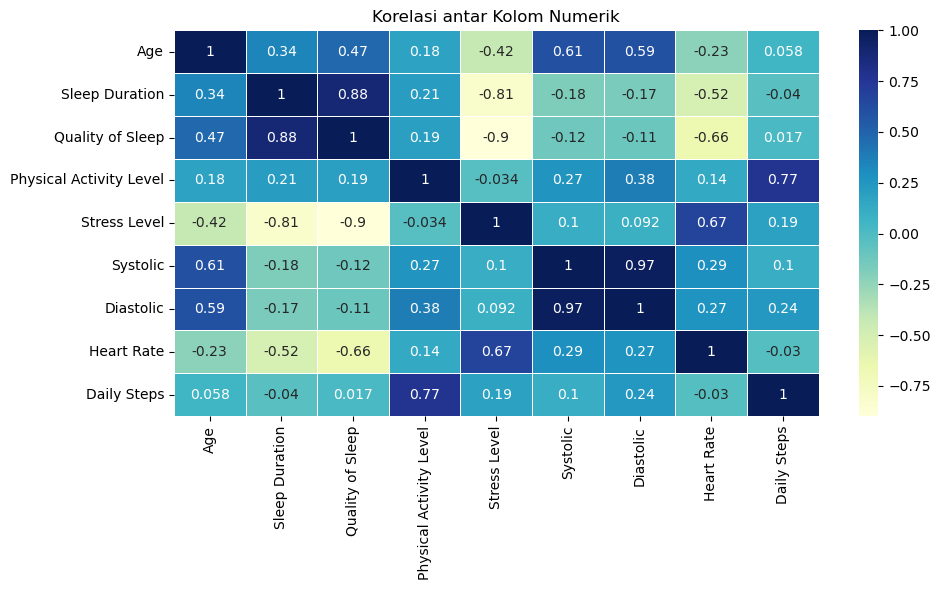

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(ds[num].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Korelasi antar Kolom Numerik')
plt.tight_layout()
plt.show()

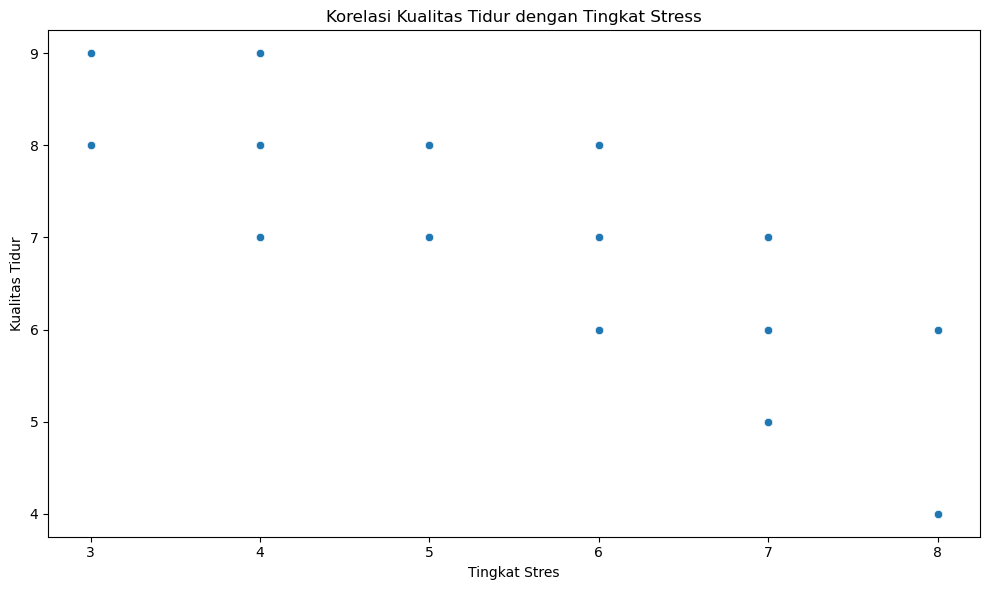

In [26]:
# Korelasi Stress level terhadap kualitas tidur
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=ds)
plt.title("Korelasi Kualitas Tidur dengan Tingkat Stress")
plt.xlabel("Tingkat Stres")
plt.ylabel("Kualitas Tidur")
plt.tight_layout()
plt.show()

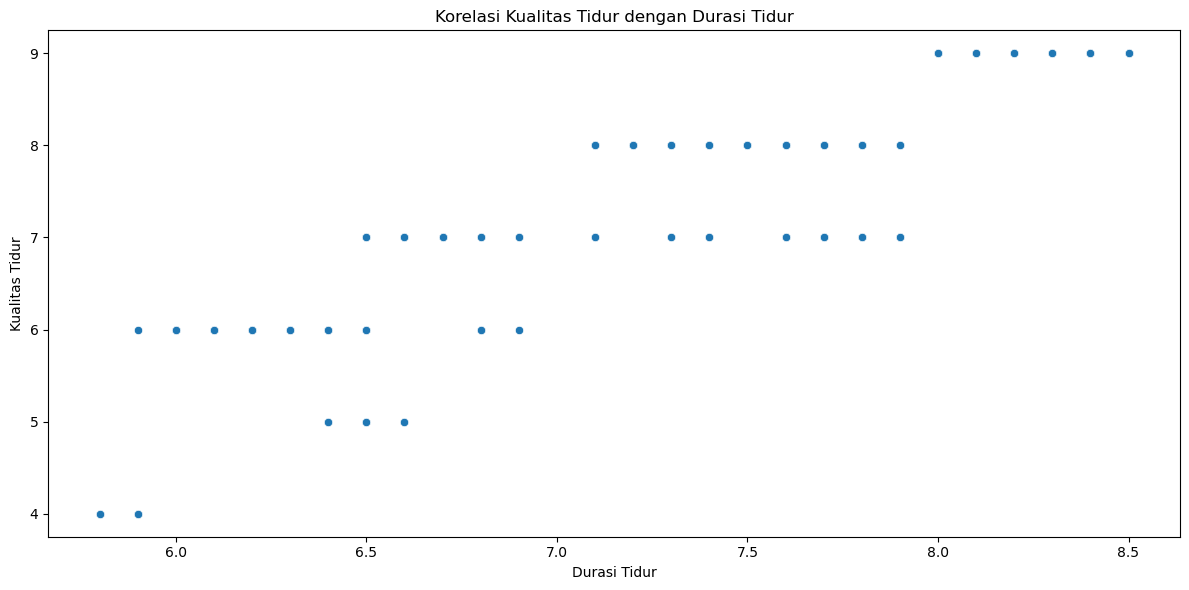

In [27]:
# Korelasi Durasi Tidur terhadap kualitas tidur
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=ds)
plt.title("Korelasi Kualitas Tidur dengan Durasi Tidur")
plt.xlabel("Durasi Tidur")
plt.ylabel("Kualitas Tidur")
plt.tight_layout()
plt.show()

<h3>Regresi Linier</h3>

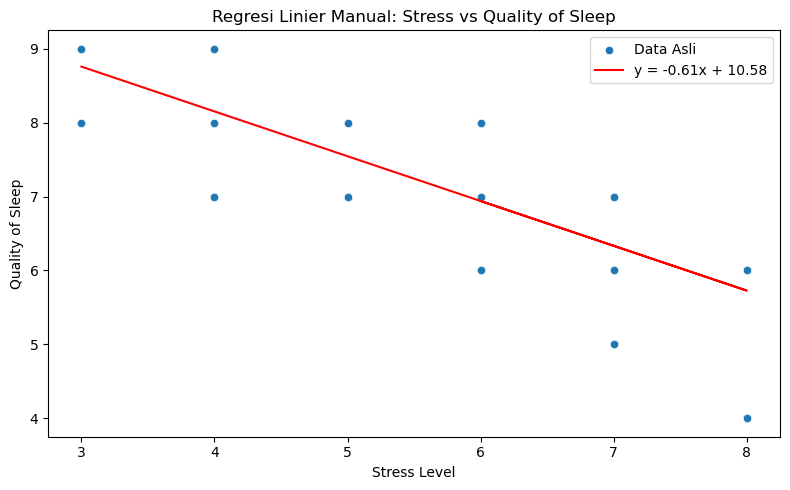

Persamaan Regresi: y = -0.61x + 10.58
Nilai R²: 0.8078


In [28]:
# Regresi manual antara stress level dan quality of sleeep
x = ds['Stress Level']
y = ds['Quality of Sleep']

# Hitung slope dan intercept
m = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
b = y.mean() - m * x.mean()

# Prediksi nilai y
y_pred = m * x + b

# Hitung R^2
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y.mean())**2)
r_squared = 1 - (ss_res / ss_tot)

# Visualisasi
plt.figure(figsize=(8,5))
sns.scatterplot(x=x, y=y, label='Data Asli')
plt.plot(x, y_pred, color='red', label=f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Regresi Linier Manual: Stress vs Quality of Sleep')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Persamaan Regresi: y = {m:.2f}x + {b:.2f}")
print(f"Nilai R²: {r_squared:.4f}")

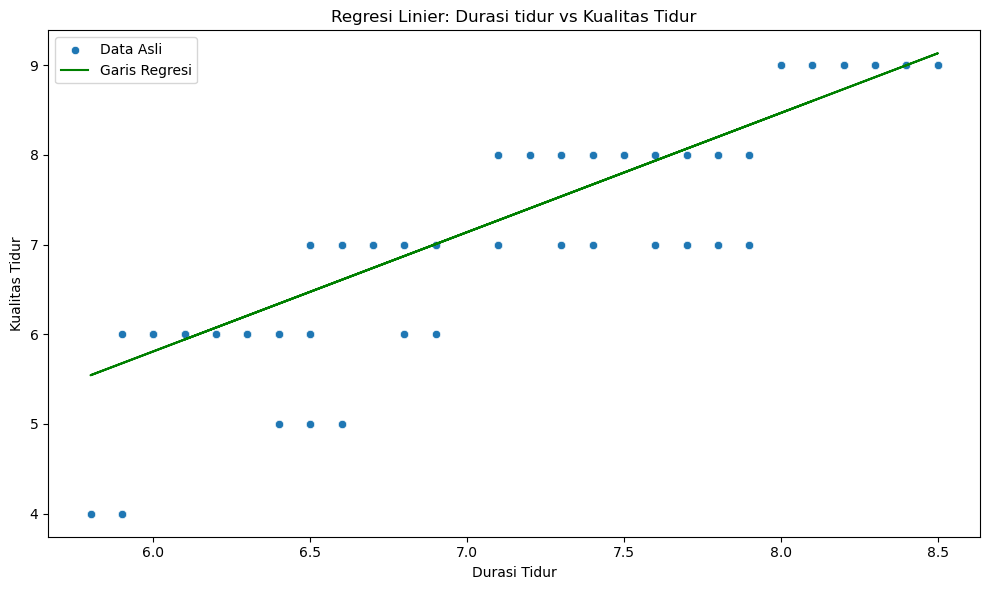

Nilai R²: 0.780


In [29]:
# Regresi linier menggunakan model sklearn antara sleep duration dan quality of sleeep

from sklearn.linear_model import LinearRegression  # Import model regresi
from sklearn.metrics import r2_score  # Import metrik R-squared

X = ds['Sleep Duration'].values.reshape(-1, 1)  # Variabel independen harus 2D
y = ds['Quality of Sleep']model = LinearRegression()model.fit(X, y)  # Melatih model

# Prediksi dan evaluasi
y_pred = model.predict(X)r2 = r2_score(y, y_pred)
# Visualisasi hasil regresi sklearn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds['Sleep Duration'], y=ds['Quality of Sleep'], label='Data Asli')plt.plot(ds['Sleep Duration'], y_pred, color='green', label='Garis Regresi')plt.xlabel('Durasi Tidur')
plt.ylabel('Kualitas Tidur')
plt.title('Regresi Linier: Durasi tidur vs Kualitas Tidur')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Nilai R²: {r2:.3f}")  # Menampilkan nilai akurasi regresi

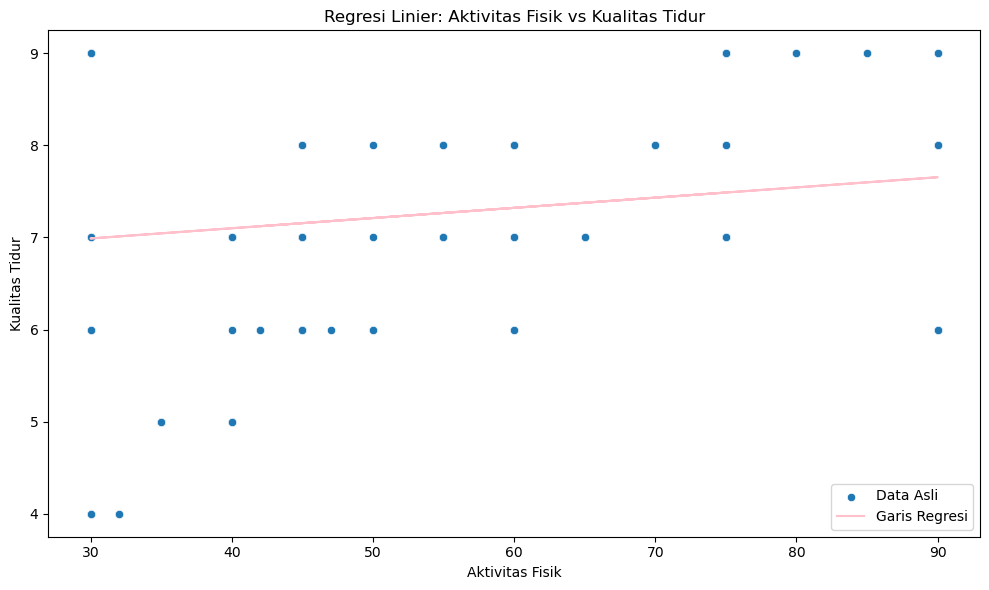

Nilai R²: 0.037


In [30]:
# Regresi linier menggunakan model sklearn antara aktifitas fisik dan quality of sleeep
X = ds['Physical Activity Level'].values.reshape(-1, 1)y = ds['Quality of Sleep']model = LinearRegression()model.fit(X, y)
# Prediksi dan evaluasi
y_pred = model.predict(X)r2 = r2_score(y, y_pred)
# Visualisasi hasil regresi sklearn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds['Physical Activity Level'], y=ds['Quality of Sleep'], label='Data Asli')plt.plot(ds['Physical Activity Level'], y_pred, color='pINK', label='Garis Regresi')plt.xlabel('Aktivitas Fisik')
plt.ylabel('Kualitas Tidur')
plt.title('Regresi Linier: Aktivitas Fisik vs Kualitas Tidur')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Nilai R²: {r2:.3f}")

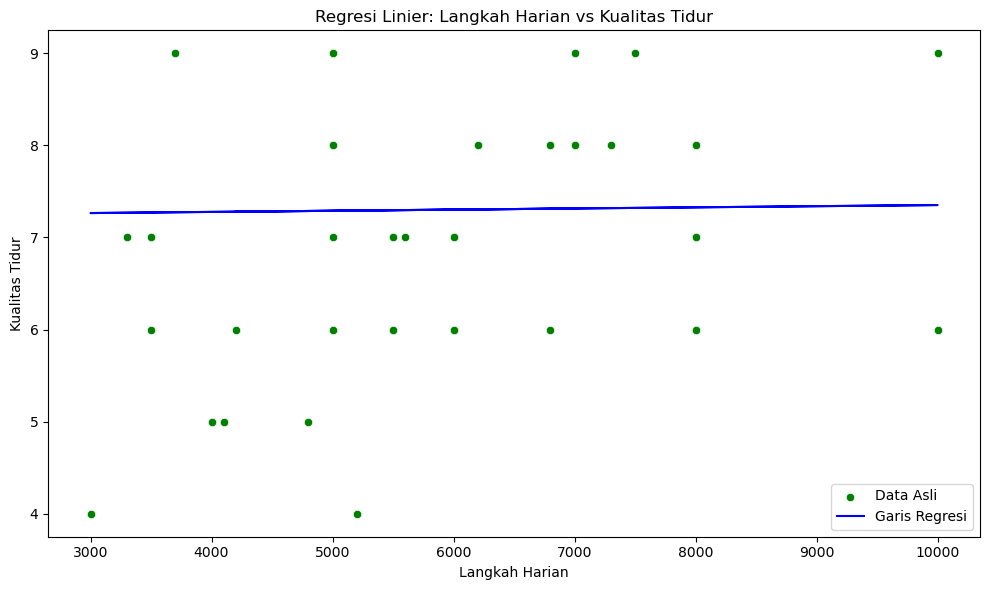

Nilai R²: 0.000


In [31]:
# Regresi linier menggunakan model sklearn antara daily steps dan quality of sleeep

X = ds['Daily Steps'].values.reshape(-1, 1)y = ds['Quality of Sleep']model = LinearRegression()model.fit(X, y)
# Prediksi dan evaluasi
y_pred = model.predict(X)r2 = r2_score(y, y_pred)
# Visualisasi hasil regresi sklearn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds['Daily Steps'], y=ds['Quality of Sleep'], label='Data Asli', color = 'Green')
plt.plot(ds['Daily Steps'], y_pred, color='blue', label='Garis Regresi')
plt.xlabel('Langkah Harian')
plt.ylabel('Kualitas Tidur')
plt.title('Regresi Linier: Langkah Harian vs Kualitas Tidur')
plt.legend()
plt.tight_layout()
plt.show()

# Nilai R² menunjukkan seberapa baik model regresi menjelaskan variasi data
print(f"Nilai R²: {r2:.3f}")  # Menampilkan nilai akurasi regresi

<h3>Kualitas tidur berdasarkan kategori object</h3>

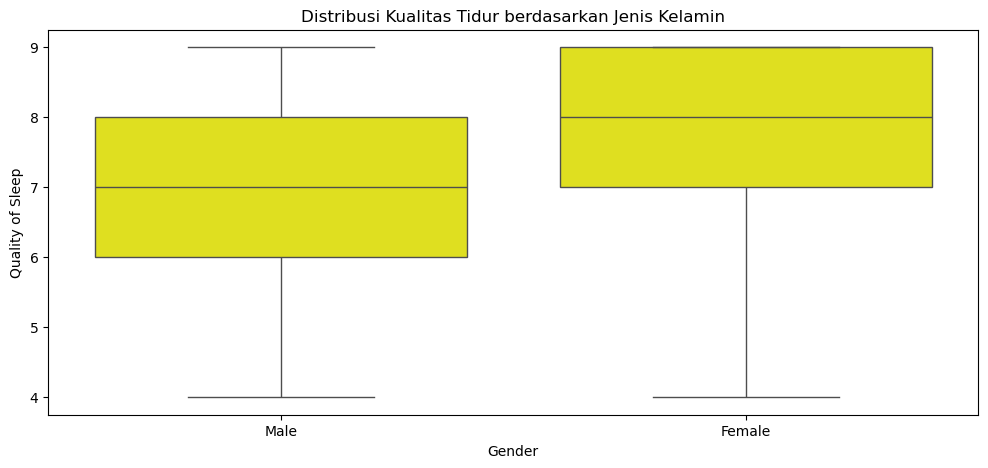

In [32]:
# Perbandingan distribusi kualitas tidur berdasarkan Gender
plt.figure(figsize=(12, 5))
sns.boxplot(x='Gender', y='Quality of Sleep', data=ds, color='Yellow')
plt.title('Distribusi Kualitas Tidur berdasarkan Jenis Kelamin')
plt.show()

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_13152\3787710125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Occupation', y='Quality of Sleep', data=ds, inner='box', palette='Set2')


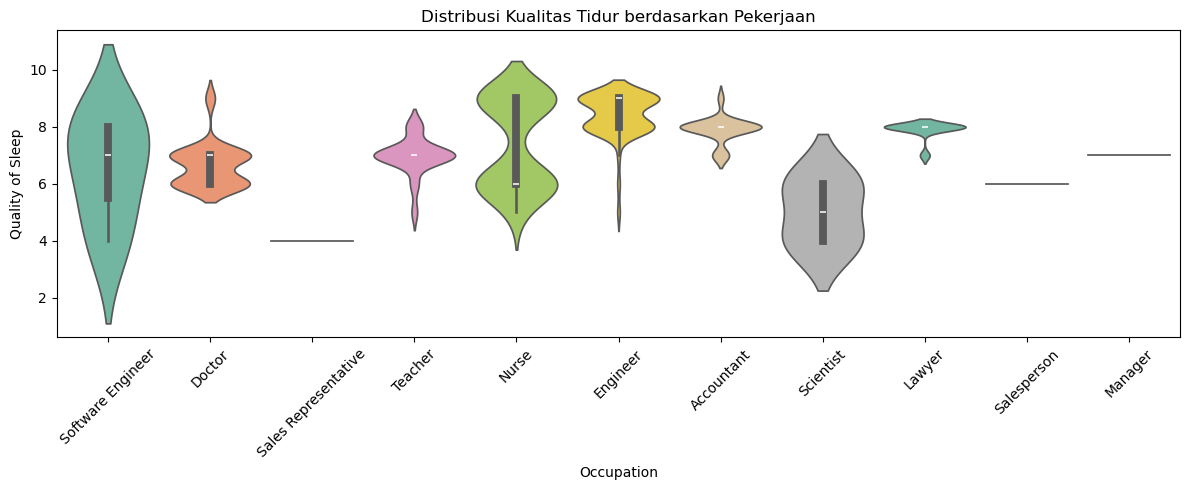

In [33]:
# Perbandingan distribusi kualitas tidur berdasarkan Pekerjaan
plt.figure(figsize=(12, 5))
sns.violinplot(x='Occupation', y='Quality of Sleep', data=ds, inner='box', palette='Set2')
plt.title('Distribusi Kualitas Tidur berdasarkan Pekerjaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_13152\2579264909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BMI Category', y='Quality of Sleep', data=ds,  palette="Set2")


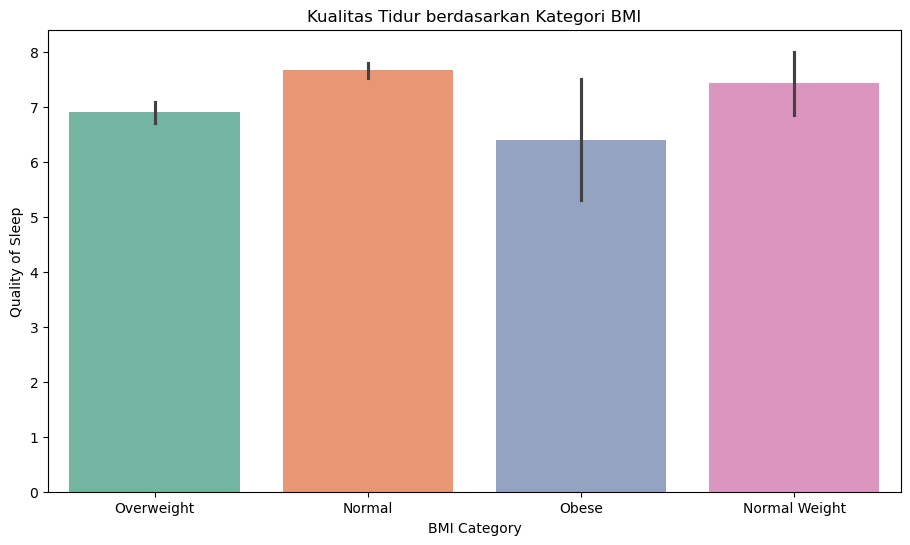

In [34]:
# Perbandingan distribusi kualitas tidur berdasarkan Kategori BMI
plt.figure(figsize=(11, 6))
sns.barplot(x='BMI Category', y='Quality of Sleep', data=ds,  palette="Set2")
plt.title('Kualitas Tidur berdasarkan Kategori BMI')
plt.show()

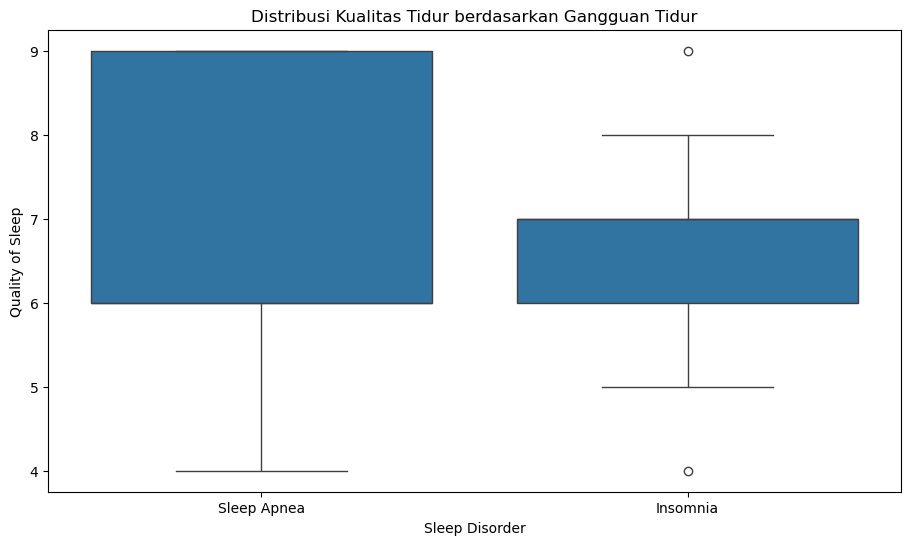

In [35]:
# Perbandingan distribusi kualitas tidur berdasarkan Gangguan Tidur
plt.figure(figsize=(11, 6))
sns.boxplot(x='Sleep Disorder', y= 'Quality of Sleep', data=ds, showfliers = True)
plt.title('Distribusi Kualitas Tidur berdasarkan Gangguan Tidur')
plt.show()

<h3>Tambahan</h3>

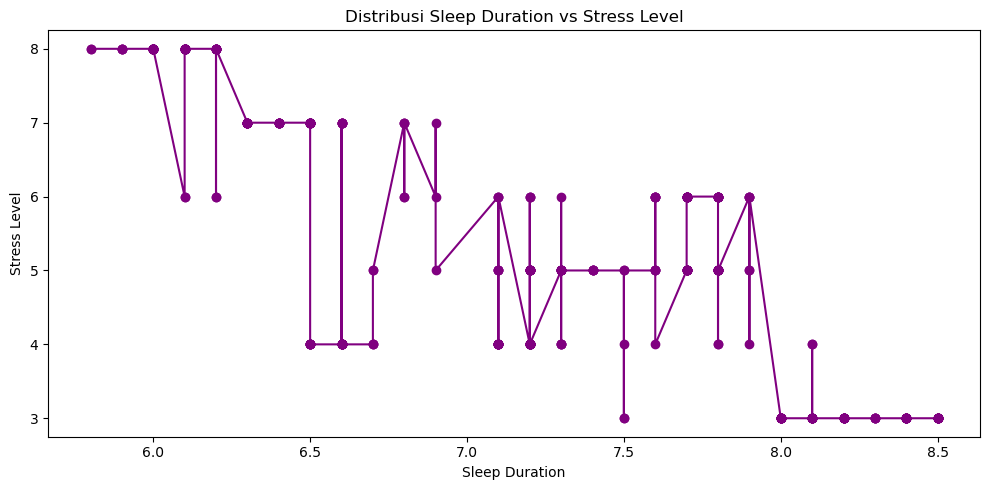

In [36]:
#Distribusi Durasi Tidur vs Stres level
ds_sorted = ds.sort_values(by='Sleep Duration')
plt.figure(figsize=(10,5))
plt.plot(ds_sorted['Sleep Duration'], ds_sorted['Stress Level'], marker='o', linestyle='-', color='purple')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Distribusi Sleep Duration vs Stress Level')
plt.tight_layout()
plt.show()

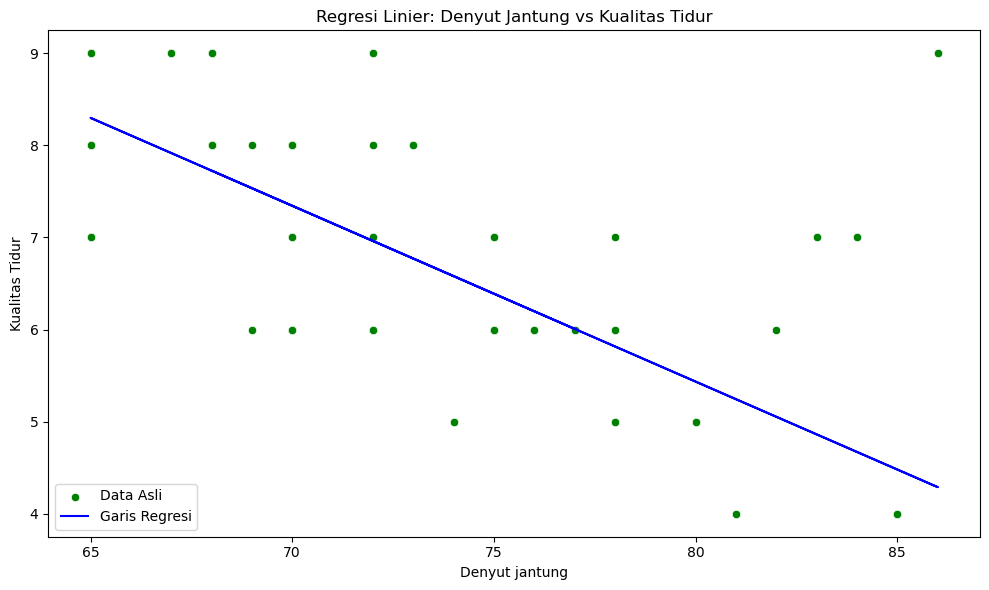

Nilai R²: 0.435


In [37]:
# Regresi linier menggunakan model sklearn antara daily steps dan quality of sleeep

X = ds['Heart Rate'].values.reshape(-1, 1)y = ds['Quality of Sleep']model = LinearRegression()model.fit(X, y)
# Prediksi dan evaluasi
y_pred = model.predict(X)r2 = r2_score(y, y_pred)
# Visualisasi hasil regresi sklearn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds['Heart Rate'], y=ds['Quality of Sleep'], label='Data Asli', color = 'Green')plt.plot(ds['Heart Rate'], y_pred, color='blue', label='Garis Regresi')plt.xlabel('Denyut jantung')
plt.ylabel('Kualitas Tidur')
plt.title('Regresi Linier: Denyut Jantung vs Kualitas Tidur')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Nilai R²: {r2:.3f}")  # Menampilkan nilai akurasi regresi